## Notebook to run the analysis for the long-term adiabatic expansions, nu trend, used in Section 5.3 of the paper Figure 12

In [1]:
from expansion_tools.blob_expansion_tools_jetset import *
from expansion_tools.delay_analysis import gamma_radio_delay_fit,gamma_radio_delay_analysis_vs_v_exp,gamma_radio_delay_analysis_vs_freq
from astropy.table import Table
from astropy.units import Unit as u
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val
delta=temp_ev_acc_flare.rad_region.jet.parameters.beam_obj.val
z=temp_ev_acc_flare.rad_region.jet.parameters.z_cosm.val
flare_duration_obs_d=temp_ev_acc_flare.parameters.duration.val/86400/delta*(1+z)

temp_ev_exp=JetTimeEvol.load_model('temp_ev_sim_exp_vs_no_exp/temp_ev_expansion_beta_exp=0.100.pkl')
t_exp=temp_ev_exp.parameters.t_jet_exp.val

t_exp_obs_d=t_exp/86400/delta
print(t_exp_obs_d,R0)




3.858024691358025 5000000000000000.0


In [2]:
from expansion_tools.delay_analysis import gamma_radio_delay_fit,gamma_radio_delay_analysis_vs_v_exp,gamma_radio_delay_analysis_vs_freq
from astropy.table import Table

In [3]:
t=Table.read('temp_ev_analysis_nu_trends/gamma_radio_delay_fit_vs_freq.ecsv')
nu_max=45E9
nu_min=1E9
t=t[t['nu_obs']<=nu_max]
t=t[t['nu_obs']>nu_min]

In [4]:
t

nu_obs,beta_exp,delta_T,delta_T_conv,delta_T_conv_err,t_decay,t_decay_conv,t_decay_conv_err,t_rise_conv,t_rise_conv_err,t_peak_radio,t_peak_gamma,A,A_err
Hz,1 / c,d,d,d,d,d,d,d,s,d,d,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5000000000.0,0.1,7.592592592592593,7.402224165628862,0.03400129081731681,3.874166188546299,3.874166188546299,0.07686796123940294,1.5025873011831852,0.07766348662512425,7.685185185185185,0.09259259259259259,1.1076918380479535e-26,1.4169780100512298e-28
10000000000.0,0.1,6.226851851851851,6.0381152883730715,0.027213441354345898,2.71923939921603,2.71923939921603,0.06254193514560015,0.9895429370515004,0.05368089084398839,6.319444444444444,0.09259259259259259,1.0316965574698771e-26,1.6068715767463977e-28
15000000000.0,0.1,5.659722222222222,5.478399997920855,0.024150582486803837,2.180048501009878,2.180048501009878,0.05467362300006435,0.7679029693811633,0.044753164351851914,5.752314814814815,0.09259259259259259,9.933985627824534e-27,1.7410449624116064e-28
20000000000.0,0.1,5.3125,5.126437532242696,0.02183817488479847,1.8529051411074486,1.8529051411074486,0.05042903673971677,0.61924088110461,0.040365440817885664,5.405092592592593,0.09259259259259259,9.547752686171949e-27,1.855595425256473e-28
25000000000.0,0.1,5.092592592592593,4.912566790821153,0.019618261906654777,1.6421681953410274,1.6421681953410274,0.046427952647695885,0.5118860915830208,0.0372166524168797,5.185185185185185,0.09259259259259259,9.334896795447588e-27,1.916161911735321e-28
30000000000.0,0.1,4.94212962962963,4.748758391322729,0.019965410074002325,1.4567538007897765,1.4567538007897765,0.04471755083796543,0.4452027101729483,0.039277890093017895,5.034722222222222,0.09259259259259259,9.13110028826502e-27,2.0738393808740226e-28
35000000000.0,0.1,4.780092592592593,4.572322049871129,0.022705044118247687,1.2904276175171079,1.2904276175171079,0.04300817407073829,0.3427280075997168,0.0444135907084747,4.872685185185185,0.09259259259259259,8.806702863958532e-27,2.2126533585366153e-28
40000000000.0,0.1,4.722222222222222,4.511428561637489,0.024740366231287555,1.206232795499214,1.206232795499214,0.042901103461580714,0.3180215007564203,0.048608589890234595,4.814814814814815,0.09259259259259259,8.737693429651547e-27,2.3585505459733677e-28


------ ExpTrise


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
ExpTrise,R0,2.371553e+14,2.371553e+14,8.780803e+13,--,1.666667e+14,1.666667e+13,1.666667e+15,False
ExpTrise,beta_exp,3.186364e-02,3.186364e-02,1.173764e-02,--,1.000000e-01,1.000000e-05,3.000000e-01,False
ExpTrise,nu_0,9.041648e+10,9.041648e+10,1.328491e+10,--,9.000000e+10,5.000000e+10,5.000000e+11,False
ExpTrise,phi,2.381879e-01,2.381879e-01,6.592214e-02,--,5.000000e-01,0.000000e+00,1.000000e+00,False


R_0  5.000000e+15
R0 fit 2.371553e+14
R0 fit *delta 7.114659e+15
p fit= 0.63+/-0.19
------ Decay


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
ExpTdec,R0,1.694709e+14,1.694709e+14,2.225525e+13,--,1.666667e+14,1.666667e+13,1.666667e+15,False
ExpTdec,beta_exp,9.343625e-02,9.343625e-02,1.219632e-02,--,1.000000e-01,1.000000e-05,3.000000e-01,False
ExpTdec,nu_0,9.768453e+10,9.768453e+10,2.187441e+10,--,9.000000e+10,5.000000e+10,5.000000e+11,False
ExpTdec,phi,5.841408e-01,5.841408e-01,2.159843e-02,--,5.000000e-01,0.000000e+00,1.000000e+00,False
ExpTdec,m_B,9.639570e-01,9.639570e-01,1.256242e-01,--,1.000000e+00,5.000000e-01,2.500000e+00,False


p fit  1.710084e+00
R_0  5.000000e+15
R_0 fit 1.694709e+14
R_0_fit*delta 5.084126e+15
p fit= 1.69+/-0.11
------ ExpDeltaT_vexp


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
DeltaT,R0,1.604010e+14,1.604010e+14,1.468965e+13,--,1.666667e+14,1.666667e+13,1.666667e+15,False
DeltaT,t_exp,3.425083e+05,3.425083e+05,5.146384e+03,--,3.333333e+05,1.666667e+05,6.666667e+05,False
DeltaT,beta_exp,5.914993e-02,5.914993e-02,5.401725e-03,--,1.000000e-01,1.000000e-05,3.000000e-01,False
DeltaT,nu_0,9.219945e+10,9.219945e+10,9.217507e+09,--,9.000000e+10,5.000000e+10,5.000000e+11,False
DeltaT,phi,4.919753e-01,4.919753e-01,2.609795e-02,--,5.000000e-01,0.000000e+00,1.000000e+00,False


R_0  5.000000e+15
R_0_fit 1.604010e+14
R_0_fit*delta 4.812030e+15
p fit= 1.40+/-0.08
t_exp 3.425083e+05
t_exp d 3.964216e+00
t_exp_sym 3.333333e+05
------


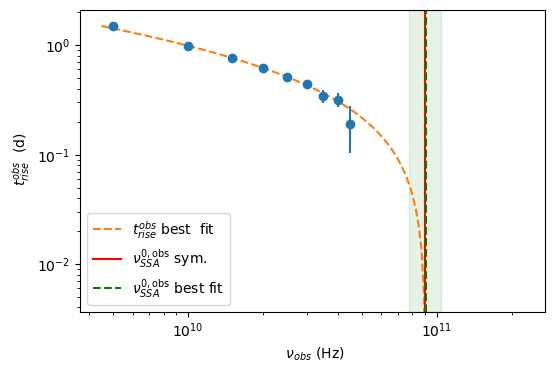

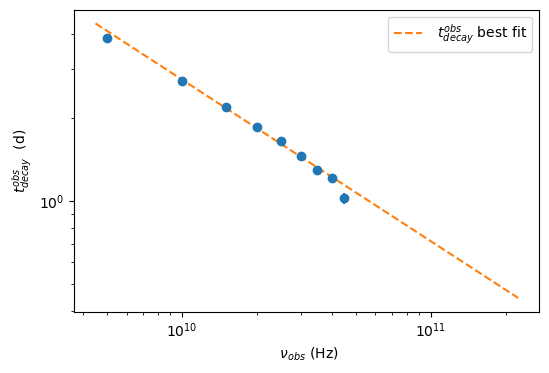

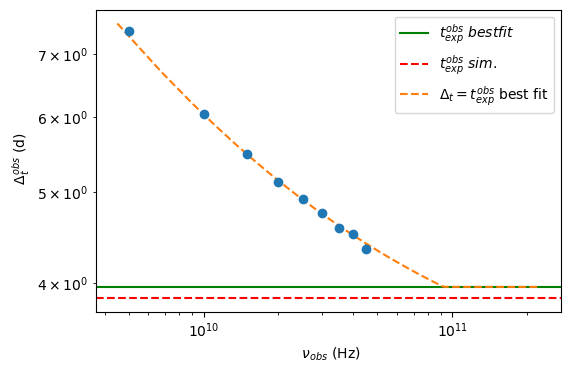

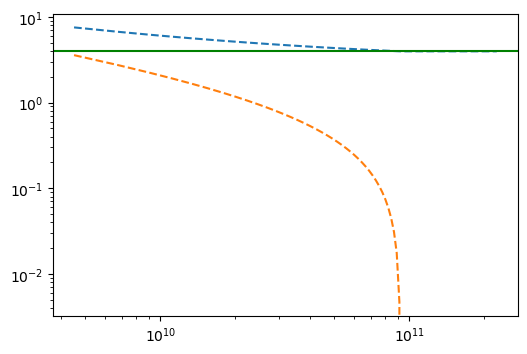

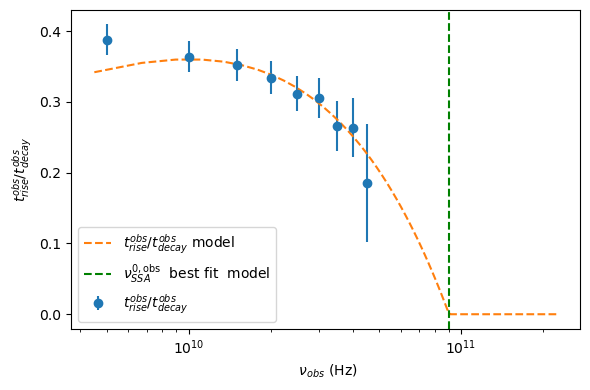

In [5]:
f_tdec,f_trise,f_delta_t,f_sp=gamma_radio_delay_analysis_vs_freq(t['nu_obs'], t['t_decay_conv'],t['t_decay_conv_err'],t['t_rise_conv'],t['t_rise_conv_err'] ,t['delta_T_conv'],t['delta_T_conv_err'],0,R0,t_exp,delta,t['beta_exp'][0],nu_0_actual=90E9)


In [6]:
#f_tdec.tight_layout()
f_tdec.savefig('temp_ev_analysis_nu_trends/t_dec_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)

#f_trise.tight_layout()
f_trise.savefig('temp_ev_analysis_nu_trends/t_rise_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)

#f_delta_t.tight_layout()
f_delta_t.savefig('temp_ev_analysis_nu_trends/delta_t_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)

#f_sp.tight_layout()
f_sp.savefig('temp_ev_analysis_nu_trends/sp_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)